**Portfolio Project**

Finding ingesting, wrangling and transforming data to get insights. With data tests and analysis

# Program Start - User Input

In [ ]:
# Main user input for the file name
csv = input("Enter file name and extention: ")

Enter file name and extention: yorks_houses.csv


# Import required libraries

Mount google drive to access the data files

In [ ]:
# importing and mounting drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Install the libraries in google drive (only the less common ones, many are pre loaded)


In [ ]:
pip install python-docx

Import libraries

In [ ]:
# importing verious libaries used in the program
import pandas as pd
from docx import Document
import docx
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

# Import and Format data class and functions

In [ ]:
#Class to import, format and test the csv. This class can also be imported as a module from a .py
class importDoc:
  #create __init__() method for the ImportDoc class
  def __init__(self, file):
    self.file = file

  #import dataframe from drive
  def dataImport(self, file):
    df = pd.read_csv('drive/My Drive/datasets/{}'.format(file))
    return df

  def format(self,df,propertyType,newBuild,duration):
    #get year and month from date using pandas' DateTimeIndex and create new columns for the data
    df['Year'] = pd.DatetimeIndex(df['Date']).year
    df['Month'] = pd.DatetimeIndex(df['Date']).month

    #assigning appropriate names to property type and new build
    df = df.replace({'Property Type': propertyType})
    df = df.replace({'New': newBuild})
    df = df.replace({'Duration': duration})
    return df

  #Test 1 to check number of counties in file
  def countyTest(self,df):
    print('Test 1: data should only contain 1 county')
    if len(df['County'].unique()) == 1:
      print('Pass: number of counties = 1')
    else:
      print('Fail: number of counties = ' + str(len(df['County'].unique())))
    return

  #Test 2 to check number of unique entries in file
  def entriesTest(self,df):
    print('Test 2: entries should be unique')
    if len(df) == df['TUI'].nunique():
      print('Pass: correct number of unique entries')
    else:
      print('Fail: duplicate entries found, check data')
    return

  #Test 3 to check if amount colum only contains numbers
  def amountTest(self,df):
    print('Test 3: Amount column only contains numbers?')
    if is_numeric_dtype(df['Price']) !=True:
      print('Fail: Amount column countains non numeric values')
    else:
      print('Pass: Amount column only contains numbers')
    return



# Data Analysis class and functions

In [ ]:
# Class to extract key data from the data frame.
class dataAnalysis:
  def __init__(self,df):
    self.df = df
    self.max = 0
    self.min = 0
    self.pre = 0
    self.noOfYrs = 0
    self.cntyNm = ''
    self.noSold = 0
    self.district = 0


  # Max year function
  def maxYear(self):
    self.max = int(self.df['Year'].max())
    print('The max year is ' + str(self.max))
    return self.max

  # Min year function and test 4 to test if data only contains one year
  def minYear(self):
    if self.df['Year'].min() == self.max:
      self.min = self.max
      print('Data only contains one year, as such the min year is set as ' + str(self.min))
    else:
      self.min = int(self.df['Year'].min())
      print('The min year is ' + str(self.min))
    return self.min

  # Previous year function and test 5 to test if data only contains one year
  def previousYear(self):
    if self.max != self.min:
      self.pre = int(self.max-1)
      print('The previous year is ' + str(self.pre))
    else:
      self.pre = self.max
      print ('Data only contains one year, as such the previuos year is set as ' + str(self.pre))
    return self.pre

  # Number of years of data and test 6 to test if the number of years is one
  def noOfYears(self):
    if self.max == self.min:
      self.noOfYrs = 1
      print('Data only contains records from ' + str(self.max))
    else:
      self.noOfYrs = int(len(self.df['Year'].unique()))
      print('There is ' + str(self.noOfYrs) + ' years of records in the data, from ' + str(self.min) + ' and ' + str(self.max))
    return self.noOfYrs

  # Name of County from data
  def countyName(self):
    self.cntyNm = str.title(self.df['County'].unique()[0])
    print('The name if the county is ' + self.cntyNm)
    return self.cntyNm

  # Mean amount for given year
  def yearlyMean(self,year):
    yrlydf =self.df.groupby(['Year'],as_index=False)['Price'].mean()
    amt = yrlydf.loc[yrlydf['Year']== year]
    return round(float(amt['Price']),2)

  # Get number of houses sold - number of rows in df
  def noOfHsSld(self):
    self.noSold = len(self.df.index)
    return self.noSold

  # Workout the percent difference between 2 numbers and return string with result
  def amountMvmt(self,amountA, amountB):
    mvmt = amountA - amountB
    perMvmt = round(mvmt/amountB*100,2)
    aVsBMvmt = ''
    if mvmt == 0:
      aVsBMvmt = "the same"
    elif mvmt < 0:
      aVsBMvmt = 'down ' + str(perMvmt) + '%'
    else:
      aVsBMvmt = 'up ' + str(perMvmt) + '%'
    return aVsBMvmt

  # Workout highest amount in a year
  def highestAmt(self,year):
    yrlydf =self.df.groupby(['Year'],as_index=False)['Price'].max()
    amt = yrlydf.loc[yrlydf['Year']== year]
    return round(float(amt['Price']),2)

  # Work out lowest amount in a year
  def LowestAmt(self,year):
    yrlydf =self.df.groupby(['Year'],as_index=False)['Price'].min()
    amt = yrlydf.loc[yrlydf['Year']== year]
    return round(float(amt['Price']),2)

  #Workout number of districts in data
  def noOfDis(self):
    self.district = self.df['District'].nunique()
    print('There are ' + str(self.district) + ' districts')
    return self.district





# Column Renaming Data

In [ ]:
# Column renaming dictionaries
propertyType = {'D': 'Detached', 'S': 'Semi-Detached', 'T': 'Terraced',  'F': 'Flats/Maisonettes', 'O': 'Other'}
newBuild = {'Y': 'Newly Built Property', 'N': 'Established Residential Building'}
duration = {'F': 'Freehold', 'L': 'Leasehold' , 'U': 'Other'}

# Importing Data from file and testing

In [ ]:
# initiate the importDoc class from user input
id = importDoc(csv)

df = id.dataImport(id.file)

df = id.format(df, propertyType, newBuild, duration)

#Test 1, 2 and 3
id.countyTest(df)
id.entriesTest(df)
id.amountTest(df)


Test 1: data should only contain 1 county
Pass: number of counties = 1
Test 2: entries should be unique
Pass: correct number of unique entries
Test 3: Amount column only contains numbers?
Pass: Amount column only contains numbers


# Data Analysis Class Initiation and Calculations

In [ ]:
# Initilising the dataAnalysis class and calling its functions to work out dates, number of years, county and number of houses sold
analysis = dataAnalysis(df)
maxYr = analysis.maxYear()
minYr = analysis.minYear()
preYr = analysis.previousYear()
noOfYr = analysis.noOfYears()
countyName = analysis.countyName()
houseSold = analysis.noOfHsSld()
districtCount = analysis.noOfDis()

# Converting dates, number of years, and number of houses sold to string
strMaxYr = str(maxYr)
strMinYr = str(minYr)
strPreYr = str(preYr)
strNoOnYr = str(noOfYr)
strHouseSold = '{:,}'.format(houseSold)
strdistrictCount = str(districtCount)



# Calculating mean price for a given year
maxYrAm = analysis.yearlyMean(maxYr)
minYrAm = analysis.yearlyMean(minYr)
preYrAm = analysis.yearlyMean(preYr)

# Max and min price by year
maxYrHigh = analysis.highestAmt(maxYr)
maxYrLow = analysis.LowestAmt(maxYr)
minYrHigh = analysis.highestAmt(minYr)
minYrLow = analysis.LowestAmt(minYr)
preYrHigh = analysis.highestAmt(preYr)
preYrLow = analysis.LowestAmt(preYr)

# Formatting mean, min and max price to be more readable
formattedMaxYrAm= '£{:,.2f}'.format(maxYrAm)
formattedMinYrAm= '£{:,.2f}'.format(minYrAm)
formattedPreYrAm= '£{:,.2f}'.format(preYrAm)

formattedmaxYrHigh= '£{:,.2f}'.format(maxYrHigh)
formattedmaxYrLow= '£{:,.2f}'.format(maxYrLow)

formattedminYrHigh= '£{:,.2f}'.format(minYrHigh)
formattedminYrLow= '£{:,.2f}'.format(minYrLow)

formattedpreYrHigh= '£{:,.2f}'.format(preYrHigh)
formattedpreYrLow= '£{:,.2f}'.format(preYrLow)

The max year is 2021
The min year is 1995
The previous year is 2020
There is 27 years of records in the data, from 1995 and 2021
The name if the county is North Yorkshire
There are 7 districts


Calculating the price difference in minYr vs preYr and maxYr vs minYr and preYr

In [ ]:
# calculating the price difference using amountMvmt class funtion
minVsPre = analysis.amountMvmt(preYrAm,minYrAm)
maxVsPre = analysis.amountMvmt(maxYrAm,preYrAm)
maxVsMin = analysis.amountMvmt(maxYrAm,minYrAm)



In [ ]:
# Grouping df by different criteria to use as data for tables and charts
propTypData = df.groupby("Property Type", as_index = False)['Price'].mean().round(2)
newBuildData = df.groupby("New", as_index = False)['Price'].mean().round(2)
durationData = df.groupby("Duration", as_index = False)['Price'].mean().round(2)
districtData = df.groupby("District", as_index = False)['Price'].mean().round(2)

dataList = [propTypData, newBuildData, durationData]


# Document Text Creation

Page 1 Text

In [ ]:
# Creating heading and text used in the first page.
docHead = 'Houses sold in ' + countyName + ' between ' + strMinYr + ' and ' + strMaxYr
para1 = 'In the ' + strNoOnYr + ' years between ' + strMinYr + ' and ' + strMaxYr + ', a total of ' + strHouseSold + ' houses have been sold in ' + countyName + '.'

priceHead = 'Average Price Breakdown by Year'
minYrPrice = 'The average price for a house sold in ' + strMinYr + ' is ' + formattedMinYrAm
preYrPrice = 'The average price for a house sold in ' + strPreYr + ' is ' + formattedPreYrAm + ' which is ' + minVsPre + ' vs ' + strMinYr
maxYrPrice = 'The average price for a house sold in ' + strMaxYr + ' is ' + formattedMaxYrAm + ' which is ' + maxVsMin + ' vs ' + strMinYr + ' and ' + maxVsPre + ' vs ' + strPreYr

minMaxHead = 'Most Expensive and Cheapest House sold by Year'
minYrMinMaxPrice = 'The most expensive house sold in ' + strMinYr + ' is ' + formattedminYrHigh + ' and the cheapest house is ' + formattedminYrLow
preYrMinMaxPrice = 'The most expensive house sold in ' + strPreYr + ' is ' + formattedpreYrHigh + ' and the cheapest house is ' + formattedpreYrLow
maxYrMinMaxPrice = 'The most expensive house sold in ' + strMaxYr + ' is ' + formattedmaxYrHigh + ' and the cheapest house is ' + formattedmaxYrLow

# Creating list for average, min and max price data
bulletListMean = [minYrPrice, preYrPrice, maxYrPrice]
bulletlistMinMax = [minYrMinMaxPrice, preYrMinMaxPrice, maxYrMinMaxPrice]

Page 2 Text

In [ ]:
# Creating text for property type table
propTypHead = 'Breakdown by Property Type'
propTypText = 'The below table shows the average price each property type sold for in ' + strNoOnYr + ' years, from ' + strMinYr + ' to ' + strMaxYr + ' in ' + countyName + ':'

# Creating text for new build table
newBuildHead = 'Breakdown by New Build'
newBuildText = 'The below table shows the average price each established vs new build sold for in ' + strNoOnYr + ' years, from ' + strMinYr + ' to ' + strMaxYr + ' in ' + countyName + ':'

# Creating text for property duration table
durationHead = 'Breakdown by Duration'
durationText = 'The below table shows the average price each freehold vs leasehold sold for in ' + strNoOnYr + ' years, from ' + strMinYr + ' to ' + strMaxYr + ' in ' + countyName + ':'

# Creating table column headings
propTypeTbl = 'Property Type'
newBuidTbl = 'New / Existing Build'
durationTabl = 'Duration Type'

# Lists of heading, text and teable heading for each of the 3 types
headList = [propTypHead, newBuildHead, durationHead]
textList = [propTypText, newBuildText, durationText]
tableHead = [propTypeTbl, newBuidTbl, durationTabl]

Page 3 Text

In [ ]:
# Creating text to be used in the graph.
graphHead = 'Average Price by District'
graphText = 'There are ' + strdistrictCount + ' districts in ' + countyName + '. The graph below shows the average price houses have sold for in each district in the ' + strNoOnYr + ' years between ' + strMinYr + ' and ' + strMaxYr + ':'


# Document Creation and Exporting

In [ ]:
#Creating a document using docx
document = Document()

Document Page 1 Creation

In [ ]:
# Adding heading, paragraph 1 and a bullet list to the first page
document.add_heading(docHead, 0)
document.add_paragraph(para1)
document.add_heading(priceHead,1)

# for loop to iterrate through bullteListMean and create a new line for each entry
for i in bulletListMean:
  document.add_paragraph(i, style='List Bullet')

#Adding space after list
document.add_paragraph()


document.add_heading(minMaxHead,1)

# for loop to iterrate through bullteListMinMax and create a new line for each entry
for i in bulletlistMinMax:
  document.add_paragraph(i, style='List Bullet')

# Page break to go on to the next page
document.add_page_break()

Document Page 2 Creation

In [ ]:
# For loop to interate through data, head and text lists using zip function
for data, head, text, tabHead in zip (dataList, headList, textList, tableHead):

  #Heading and text for each table
  document.add_heading(head,1)
  document.add_paragraph(text)

  # Create empty table with 1 extra row then the amount of rows in the data and same amount of columns
  numOfRows = data.shape[0] +1
  numOfCols = data.shape[1]
  table = document.add_table(rows=numOfRows,cols=numOfCols, style= 'Colorful List')

  # Column headings in row 1 of table
  row = table.rows[0].cells
  row[0].text = tabHead
  row[1].text = 'Average Price'

  # Interate through the number of rows in data and fill cells with data. The cell number in ofset by 1 to account for the first row
  for i in range(data.shape[0]):
    for j, cell in enumerate(table.rows[i+1].cells):
      cell.text = str(data.values[i][j])

  #Adding space after table
  document.add_paragraph()


# Page break to go on to the next page
document.add_page_break()





Document Page 3 Creation

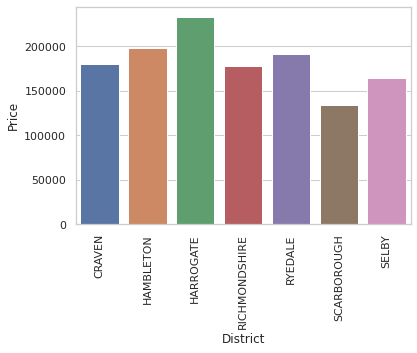

In [ ]:
# Graph page heading and paragraph
document.add_heading(graphHead,1)
document.add_paragraph(graphText)

# Creating graph using districtData
sns.set_theme(style="whitegrid")
graph = sns.barplot(x = 'District', y='Price', data = districtData)

# Rotating the X axis labels
graph.set_xticklabels(graph.get_xticklabels(),rotation = 90)

# Saving the graph
plt.savefig('drive/My Drive/datasets/{}.png'.format(countyName), bbox_inches='tight')

In [ ]:
# Add graph to document
document.add_picture('drive/My Drive/datasets/{}.png'.format(countyName))

In [ ]:
# Save complete document
document.save('drive/My Drive/datasets/{}.docx'.format(countyName))

**The End**